# 25、使用KNN对手写数字进行识别

手写数字这个数据集同样也适合使用SVM、朴素贝叶斯和决策树来做分类

## 如何使用sklearn中的KNN

在Python的sklearn工具包中有KNN算法。KNN既可以做分类器，也可以做回归。如果是做分类，需要这样引用：

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

从名字上我们也能看得出来的Classifier对应的是分类，Regressor对应的是回归。一般来说如果一个算法有Classifier类，都能够找到相对应的Regressor类。比如在决策树分类中，你可以使用DecisionTreeClassifier，亦可以使用决策树来做回归DecisionTreeRegressor。

那么如何在sklearn中创建KNN分类器

这里，使用的是构造函数KNeighborClassifier(n_neighbors=5, weights= 'uniform', algorithm='auto',leaf_size=30),这里有几个比较主要的参数，分别代表的含义如下：

- 1、n_neighbors:即KNN中的K值，代表的是邻居的数量。K值如果比较小，会造成过拟合。如果K值比较大，无法将未知的物体分类出来。一般我们使用默认值5。
- 2、weights：是用来确定邻居的权重，有三种方式：
    - weights=uniform，代表的是所有邻居的权重相同；
    - weights=distance，代表权重是距离的倒数，即与距离成反比；
    - 自定义函数，我们可以自定义不同的距离所对应的权重。大部分情况下是不需要自己去定义函数的。
- 3、algorithm：用来规定计算邻居的方法，他有四种方式：
    - algorithm=auto：根据数据的情况自动选择合适的算法，默认情况下选择auto；
    - algorithm=kd_tree，也叫做KD树，是多维空间的数据结构，方便对关键数据进行检索，不过KD树适合于维度少的情况，一般维数不超过20，如果维数大于20之后，效率反而会下降；
    - algorithm-ball_tree:也叫做球树，它是和KD树一样的都是多为空间的数据结果，不同于KD树，球树更加适合应用于维度大的情况；
    - algorithm=brute：也叫做暴力搜索，它和KD树不同的地方是在于采用的是线性扫描，而不是通过构造树结构进行的快速检索。当训练集大的时候，效率很低。
- 4、leaf_size:代表的是构造KD树或者球树时的叶子数，默认是30，调整leaf_size会影响到树的结构和搜索的速度。

创建完成KNN分类器之后，我们就可以输入训练集对它进行训练，这里我们使用fit()函数，传入训练集中的样本特征矩阵和分类标识，会自动得到训练好的KNN分类器。然后可以使用predict()函数来对结果进行预测，这里传入的是测试集的特征矩阵，可以得到测试集的预测分类结果。


## 如何使用KNN对手写数字进行识别分类

手写数字数据集是一个非常有名的用于图像识别的数据集。数字识别的过程就是将这些图片与分类结果0-9 一一对应起来。完整的手写数字数据集MNSIT里面包含有60000个训练的样本，以及10000个测试样本。如果是学习深度学习的话，MNIST基本上就是我们接触的第一个数据集。

这里使用的是一个sklearn自带的手写数字数据集进行KNN分类，我们可以把这个数据集理解成为一个简版的MNIST数据集，它只包含1797幅数字图像，每幅图像大小是8*8像素。

KNN的分类流程：
- 1、数据获取
- 2、准备阶段：数据探索==>数据清洗==>特征选择
- 3、分类阶段：模型训练==>模型评估
![](KNN分类流程.jpg)

整个训练过程基本上都会包括三个阶段：
- 1、数据加载阶段：我们可以直接从sklearn中加载自带的手写数字数据集；
- 2、准备阶段：在这个阶段中，我们需要对数据集有个初步的了解，比如样本的个数、图像长什么样、识别结果是怎样的。你可以通过可视化的方式来查看图像的呈现。通过数据的规范化可以让数据都在同一个数量级的维度。另外，因为训练集是图像，每幅图像是8*8的矩阵，我们不需要对它进行特征选择，将全部的图像数据作为特征矩阵即可。
- 3、分类阶段：通过训练可以得到分类器，然后用测试集进行准确率的计算。

首先是加载数据和对数据进行探索:

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


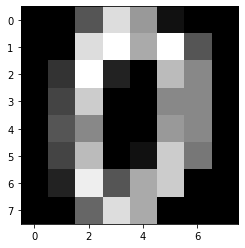

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits    # 注意加载数据的时候应该从数据集里面加载
import  matplotlib.pyplot as plt

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义:代表数字0
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

我们对原始数据集中的第一幅进行了数据的可视化，可以看到图像是个8*8的图像矩阵，上面的这幅图像是一个“0”，从训练集的分类标注中我们也可以看到分类标注为“0”

sklearn自带的手写数字数据集一个包含了1979个样本，每幅图像都是8*8像素的矩阵。因为并备有装满的测试集，所以我们需要对数据集进行划分，划分成训练集和数据集。因为KNN算法和距离定义有关，我们需要对数据进行规范化处理。采用Z-Score规范化，代码如下所示：

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits    # 注意加载数据的时候应该从数据集里面加载
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义:代表数字0
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()
# 分割数据，将25%的数据作为测试集，其余作为训练集（当然也可以指定其他比例。）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
# 使用训练集进行拟合
train_ss_x = ss.fit_transform(train_x)
# 使用测试集进行验证
test_ss_x = ss.transform(test_x)

然后我们构造一个KNN分类器knn，把训练集的数据传入构造好的knn，并通过测试集进行结果预测，与测试集的结果进行对比，得到KNN分类器准确率，代码如下：

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


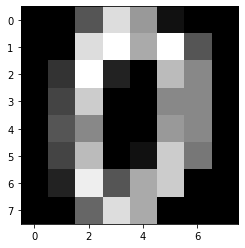

KNN 准确率：0.9756


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits    # 注意加载数据的时候应该从数据集里面加载
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 导入预处理工具，将数据进行规范化
from sklearn import preprocessing  
# 导入评价准确率的指标
from sklearn.metrics import accuracy_score

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义:代表数字0
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()
# 分割数据，将25%的数据作为测试集，其余作为训练集（当然也可以指定其他比例。）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
# 使用训练集进行拟合
train_ss_x = ss.fit_transform(train_x)
# 使用测试集进行验证
test_ss_x = ss.transform(test_x)

# 创建KNN分类器
knn = KNeighborsClassifier()
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print("KNN 准确率：%.4lf" % accuracy_score(test_y, predict_y))

这样我们就构造好了一个KNN分类器。之前还讲过的SVM、朴素贝叶斯和决策树分类。我们用手写数字数据集一起来训练一下这些分类器，然后就可以对比一下这些分类器的效果。代码如下：

In [ ]:
# 创建SVM分类器
svm = SVC()
svm.fit(train_ss_x, train_y)
predict_y = svm.predict(test_ss_v)
print('SVM 准确率：%0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min—Max规范化
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.trainsform(test_x)
# 创建 Navie Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y)
predict_y = mnb.predict(test_mm_x)
print("多项式朴素贝叶斯准确率：%.4lf" % accuracy_score(test_y,predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y)
predict_y = dtc.predict(test_mm_x)
print("CART 决策树的准确率为：%.4lf" % accuracy_score(test_y,predict_y))


整合上面的代码：

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


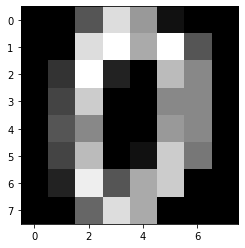

KNN 准确率：0.9756
SVM 准确率：0.9867
多项式朴素贝叶斯准确率：0.8844
CART 决策树的准确率为：0.8467


In [4]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits    # 注意加载数据的时候应该从数据集里面加载
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 导入预处理工具，将数据进行规范化
from sklearn import preprocessing  
# 导入评价准确率的指标
from sklearn.metrics import accuracy_score

# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义:代表数字0
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()
# 分割数据，将25%的数据作为测试集，其余作为训练集（当然也可以指定其他比例。）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
# 使用训练集进行拟合
train_ss_x = ss.fit_transform(train_x)
# 使用测试集进行验证
test_ss_x = ss.transform(test_x)

# 创建KNN分类器,参数可以使用默认，也可以自己制定，大部分情况下使用默认即可（括号中保持为空）
# 如果将K值甚至成为200，分类的准确度就会降低很多！KNN 准确率：0.8489
knn = KNeighborsClassifier(n_neighbors=5, weights= 'uniform', algorithm='auto',leaf_size=30)
knn.fit(train_ss_x, train_y)
predict_y = knn.predict(test_ss_x)
print("KNN 准确率：%.4lf" % accuracy_score(test_y, predict_y))

# 创建SVM分类器（高斯核函数,其系数为gamma='auto'）
svm = SVC(kernel='rbf',C=1.0,gamma='auto')
svm.fit(train_ss_x, train_y)
predict_y = svm.predict(test_ss_x)
print('SVM 准确率：%0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min—Max规范化，因为多项式贝叶斯不能传入负数
mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建 Navie Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y)
predict_y = mnb.predict(test_mm_x)
print("多项式朴素贝叶斯准确率：%.4lf" % accuracy_score(test_y,predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y)
predict_y = dtc.predict(test_mm_x)
print("CART 决策树的准确率为：%.4lf" % accuracy_score(test_y,predict_y))


这里需要注意的是，在做**多项式朴素贝叶斯分类的时候传入的数据不能有负数**。因此Z-Score会将数值规范化为一个标准的正态分布，即均值为0，方差为1，数值会包含负数。因此我们需要**采用Min-max规范化，将数据规范化到[0,1]范围内**。
 多项式朴素贝叶斯实际上是符合多项式分布，不会存在负数。而高斯朴素贝叶斯呈现的是高斯分布，也就是正态分布，比如均值为0，方差为1的标准正态分布，可以存在负数。

整理上面的4个分类器的结果：

|分类器|准确率|排名|
|--|--|--|
|KNN 准确率：|0.9756|2|
|SVM 准确率：|0.9867|1|
|多项式朴素贝叶斯准确率：|0.8844|3|
|CART 决策树的准确率为：|0.8511|4|

可以看出KNN的准确率还是不错的，和SVM不相上下。完整的代码中包含train_test_split做数据集的拆分，使用matplotlib.pyplot工具包显示图像。使用accuracy_score进行分类器准确率的计算，使用preprocessing中的StandardScaler和MinMaxScaler做数据的规范化。

## 总结

1、分类器：
- KNN、SVM、朴素贝叶斯和决策树性能比拼。
- 在数据挖掘的过程都可以大致总结为：数据搜索、数据可视化、数据规范化、模型训练和结果评估
- 在数据量不大的情况下，使用sklearn非常方便。
- 如果数据量很大，比如MNIST数据集中的6万个训练数据和1万个测试数据，那么采用深度学习+GPU运算的方式会更加符合。因为深度学习的特点就是需要大量的重复的计算，GPU最擅长的就是做大量的并行计算。

2、KNN实战
- 数据集
    - 手写数字数据集，将数字图像0-9进行对应
    - 采用sklearn自带的简版数据集，1797幅图，每幅图8*8的矩阵
- sklearn使用
    - 分类:KNeighborsClassifier,回归：KNeighborRegressor
    - KNeighborClassifier构造参数：
        - n_neighbors:即KNN中的K值，默认是5
        - weights：用来确定邻居的权重，三种方式：'uniform','distance',自定义函数
        - algorithm：规定计算邻居的方法，四种方式:'auto','kd_tree','ball_tree','brute'
        - leaf_size:代表构造KD树或者球树的叶子数，默认是30
    - KNeighborsClassifier功能函数：
        - fit(train_x, train_y):分类器的训练
        - predict(test_x):用训练好的分类器进行预测
- 项目流程
    - 准备阶段：数据探索，数据可视化、数据规范化
    - 分类阶段：特征选择，模型训练，结果评估
    - 四种分类器的准确率比较
    
![](knn实战.png)